# Olist Store Case Study

The objective of Olist this year is to grow total sales revenue (please note that Olist has no control over the prices and shipping charges set by its partners)

## Analyst Framework

Objective: Increase Olist's total sales revenue by 10%
(Olist has no control over the prices and shipping charges set by its partners)

Sale Revenue = # of Unit Sold  x  Average Selling Price

Number of Unit Sold:

1. **Oppertunities 1:** Increase Olist's total sales revenue by 10%
(Olist has no control over the prices and shipping charges set by its partners)

2. **Oppertunities 2:** Increase order frequency (more orders per person per week)

3. **Oppertunities 3:** Increase order size (more items per order)

## Key Recommendations

1. **INCREASE CUSTOMERS**

*   Strengthen marketing and promotional strategies in Sao Paulo (the area with the highest demand) with products like bath tables and health beauty items to attract new customers.
*   Analyze the reasons for long preparation times in MA, RN, and MS, and warn merchants with high revenue but large order delays to reduce preparation times.
*   Prioritize allocating shipping resources to areas with long delivery times (RR, AP, AM, AL, PA) and high delivery delay rates (CR, PI, SE, MA, AL) to reduce delivery times and increase shipping efficiency.
*   Optimize credit card payment methods, the most preferred method, to ensure a smooth experience and reduce errors to under 0.5%.

2. **INCREASE ORDER FREQUENCY:**

*   Intensify sending emails/push notifications during peak hours (10 AM-4 PM and 8 PM-9 PM) and optimize the customer support team to boost orders.


3. **INCREASE NUMBER OF ITEM/ ORDERS**

*   Encourage customers to buy more items per order through bulk discounts and by suggesting suitable product bundles.




## Output
1. Analyst framework
2. Prepare Data
3. Data Analytics
4. Turning Insights into Business Recommendations

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Problem-solving framework
   
   1. Clear Problem:
      
      What was the revenue for the past 6 months?
      How much was your marketing spend last quarter?

   2. Unclear Problem:
      
      Why are customers no longer using our service?
      What is causing the drop in website traffic?
      Analyze customer experience to increase revenue next year

Problem-solving framework:
1. Understand and clarify the problem statement:
   
   Objective: Why we need to analyze this problem?

   5W1H: Why, who, what, when, how

   CPCC: Company, Product, Customer, Competition

   Problem formulation:

    1. SMART objectives (constrains priorities)

    2. Scope of the problem

    3. Since when are you facing the problem?

    4. Magnitude of the problem

    5. Why certain decisions being taken now?
    (Market Entry Cases)

    6. Geography specific?

  Company:
  
    1. Business lines and revenue segments

    2. Locations - Plants, Sales

    3. Business Model and Distribution Model

    4. Scale of operation

    5. Type of player - Low cost or differentiated

    6. How old is the company

  Product:
    
    1. SKUs - type, variants, sizes

    2. USP of the product

    3. Revenue share by product

    4. Is the problem specific to the product?

  Customer:
    
    1. How are the customers segmented

    2. Customer segments served?

    3. Different customer and consumer?

    4. Revenue contribution of channel partners

    5. Is the problem specific to a customer segment?

  Competition:

    1. Who are the competitors and what are their market shares?

    2. Who are the indirect competitiors?

    3. Fragmented and concentrated industry

    4. Are competitors also facing the issue?
2. Structure the problem (chia nho van de):
   
    Nguyen tac MECE:
        Mutually Exclusive (Khong chong cheo)
        Collectively Exhaustive (Bao quat toan bo)

    Quy luat 80/20:
        Sap xep quan trong len dau, it quan trong de sau
        Quy tac 20, sap xep 20% nguyen nhan anh huong den 80% den main point len truoc

    Nguyen tac MECE: theo cau truc dai so

    Vi du profit = revenue - cost

    Nguyen tac MECE: theo cau truc quy trinh

    Vi du buoc nhan thuc -> truy cap -> quy trinh

# 1. Load and Clean data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_customers = pd.read_csv('/content/drive/MyDrive/Julie/ecomerce_dataset/customers.csv')
df_geolocation = pd.read_csv('/content/drive/MyDrive/Julie/ecomerce_dataset/geolocation.csv')
df_sellers = pd.read_csv('/content/drive/MyDrive/Julie/ecomerce_dataset/sellers.csv')

df_category_name = pd.read_csv('/content/drive/MyDrive/Julie/ecomerce_dataset/product_category_name_translation.csv')
df_products = pd.read_csv('/content/drive/MyDrive/Julie/ecomerce_dataset/products.csv')
df_payments = pd.read_csv('/content/drive/MyDrive/Julie/ecomerce_dataset/order_payments.csv')

df_orders =pd.read_csv('/content/drive/MyDrive/Julie/ecomerce_dataset/orders.csv')
df_items = pd.read_csv('/content/drive/MyDrive/Julie/ecomerce_dataset/order_items.csv')
df_reviews = pd.read_csv('/content/drive/MyDrive/Julie/ecomerce_dataset/order_reviews.csv')

In [4]:
dfs = [df_category_name, df_customers, df_geolocation, df_items, df_orders, df_payments,

       df_products, df_reviews, df_sellers]

df_names = ['df_category_name', 'df_customers', 'df_geolocation', 'df_items', 'df_orders',

            'df_payments', 'df_products', 'df_reviews','df_sellers']

summary_data = []

for df, name in zip(dfs, df_names):

    shape = df.shape  # (số dòng, số cột)

    columns = list(df.columns)  # Tên các cột

    summary_data.append({

        'Tên bảng': name,

        'Shape': shape,

        'Tên cột': columns,

    })

# Tạo DataFrame từ thông tin tổng hợp

summary_df = pd.DataFrame(summary_data)

summary_df

,Tên bảng,Shape,Tên cột
0,df_category_name,"(71, 2)","[product_category_name, product_category_name_..."
1,df_customers,"(99441, 5)","[customer_id, customer_unique_id, customer_zip..."
2,df_geolocation,"(1000163, 5)","[geolocation_zip_code_prefix, geolocation_lat,..."
3,df_items,"(112650, 7)","[order_id, order_item_id, product_id, seller_i..."
4,df_orders,"(99441, 8)","[order_id, customer_id, order_status, order_pu..."
5,df_payments,"(103886, 5)","[order_id, payment_sequential, payment_type, p..."
6,df_products,"(32951, 9)","[product_id, product_category_name, product_na..."
7,df_reviews,"(99224, 7)","[review_id, order_id, review_score, review_com..."
8,df_sellers,"(3095, 4)","[seller_id, seller_zip_code_prefix, seller_cit..."


## Clean data

### Merge data

In [5]:
# Bat dau tu bang fact (bang chua cac cot do luong)
df1 = pd.merge(df_items,df_orders,on = 'order_id', how = 'left')
df2 = pd.merge(df1,df_payments, on = 'order_id', how = 'left')
df3 = pd.merge(df2,df_products, on = 'product_id', how = 'left')
df4 = pd.merge(df3,df_customers, on = 'customer_id',how = 'left')
df5 = pd.merge(df4,df_sellers, on = 'seller_id',how = 'left')
df6 = pd.merge(df5,df_category_name, on = 'product_category_name',how = 'left')
df_reviews = df_reviews.sort_values(by = 'review_creation_date', ascending = False).drop_duplicates(subset = 'order_id', keep = 'first')
df = pd.merge(df6,df_reviews, on = 'order_id', how = 'left')
df.count()

,0
order_id,117604
order_item_id,117604
product_id,117604
seller_id,117604
shipping_limit_date,117604
price,117604
freight_value,117604
customer_id,117604
order_status,117604
order_purchase_timestamp,117604


In [6]:
df2[df2.duplicated(subset =['order_id','order_item_id'],keep = False)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
38,0016dfedd97fc2950e388d2971d718c7,1,4089861a1bd4685da70bddd6b4f974f1,a35124e2d763d7ca3fbe3b97d143200f,2017-05-05 10:05:12,49.75,20.80,2c8b917c5d7dd720ebe36a5ed3b501ec,delivered,2017-04-28 19:54:40,2017-04-29 10:05:12,2017-05-16 08:40:49,2017-05-22 18:32:21,2017-06-01 00:00:00,2.0,voucher,1.0,17.92
39,0016dfedd97fc2950e388d2971d718c7,1,4089861a1bd4685da70bddd6b4f974f1,a35124e2d763d7ca3fbe3b97d143200f,2017-05-05 10:05:12,49.75,20.80,2c8b917c5d7dd720ebe36a5ed3b501ec,delivered,2017-04-28 19:54:40,2017-04-29 10:05:12,2017-05-16 08:40:49,2017-05-22 18:32:21,2017-06-01 00:00:00,1.0,credit_card,5.0,52.63
80,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,NaN,2018-04-16 00:00:00,1.0,voucher,1.0,44.11
81,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,NaN,2018-04-16 00:00:00,2.0,voucher,1.0,33.18
182,0071ee2429bc1efdc43aa3e073a5290e,1,00ffe57f0110d73fd84d162252b2c784,53e4c6e0f4312d4d2107a8c9cddf45cd,2018-01-26 14:17:41,179.98,12.46,081a2d41949e652a50988fd39febb4a8,delivered,2018-01-22 11:08:15,2018-01-22 14:17:41,2018-01-26 15:12:17,2018-01-31 23:58:36,2018-02-15 00:00:00,1.0,voucher,1.0,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117441,ffa1dd97810de91a03abd7bd76d2fed1,1,2f178dc91b792930e1ff40a77a123506,75d34ebb1bd0bd7dde40dd507b8169c3,2017-06-06 22:42:56,434.99,20.32,f37c2634dfc8ac0ce3475d3cfc665b43,delivered,2017-05-22 22:35:09,2017-05-23 22:42:56,2017-05-25 10:33:08,2017-06-06 16:40:29,2017-06-28 00:00:00,1.0,credit_card,1.0,36.58
117445,ffa39020fe7c8a3e907320e1bec4b985,1,9e0e152552a1323f7e5dcf63d50cdae3,cc419e0650a3c5ba77189a1882b7556a,2017-11-10 18:55:13,56.99,14.15,26978239b9a0ccb40d576a0a099158b0,delivered,2017-10-31 18:34:34,2017-10-31 19:34:38,2017-11-03 23:57:43,2017-11-21 20:41:55,2017-11-28 00:00:00,2.0,voucher,1.0,64.01
117446,ffa39020fe7c8a3e907320e1bec4b985,1,9e0e152552a1323f7e5dcf63d50cdae3,cc419e0650a3c5ba77189a1882b7556a,2017-11-10 18:55:13,56.99,14.15,26978239b9a0ccb40d576a0a099158b0,delivered,2017-10-31 18:34:34,2017-10-31 19:34:38,2017-11-03 23:57:43,2017-11-21 20:41:55,2017-11-28 00:00:00,1.0,credit_card,1.0,7.13
117512,ffc730a0615d28ec19f9cad02cb41442,1,20b4a894367b7b66ea1c5ae7efb5a7eb,9f505651f4a6abe901a56cdc21508025,2018-07-27 14:15:15,19.99,7.40,7ba25938d3d2de27a81b3af43e2c5a51,delivered,2018-07-25 14:03:13,2018-07-25 14:15:15,2018-07-25 14:56:00,2018-07-26 22:05:08,2018-08-02 00:00:00,2.0,credit_card,1.0,12.63


In [7]:
df_reviews[df_reviews.duplicated(subset = 'order_id',keep = False)].sort_values('order_id')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [8]:
df_reviews = df_reviews.sort_values(by = 'review_creation_date', ascending = False).drop_duplicates(subset = 'order_id', keep = 'first')

### Data Type

In [ ]:
# datatype
# typo => pass
# duplicate => pass
# missing data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117604 entries, 0 to 117603
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117604 non-null  object 
 1   order_item_id                  117604 non-null  int64  
 2   product_id                     117604 non-null  object 
 3   seller_id                      117604 non-null  object 
 4   shipping_limit_date            117604 non-null  object 
 5   price                          117604 non-null  float64
 6   freight_value                  117604 non-null  float64
 7   customer_id                    117604 non-null  object 
 8   order_status                   117604 non-null  object 
 9   order_purchase_timestamp       117604 non-null  object 
 10  order_approved_at              117589 non-null  object 
 11  order_delivered_carrier_date   116359 non-null  object 
 12  order_delivered_customer_date 

In [10]:
cols = ['shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
def convert_datetime(col):
    df[col] = pd.to_datetime(df[col])
for col in cols:
    convert_datetime(col)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117604 entries, 0 to 117603
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117604 non-null  object        
 1   order_item_id                  117604 non-null  int64         
 2   product_id                     117604 non-null  object        
 3   seller_id                      117604 non-null  object        
 4   shipping_limit_date            117604 non-null  datetime64[ns]
 5   price                          117604 non-null  float64       
 6   freight_value                  117604 non-null  float64       
 7   customer_id                    117604 non-null  object        
 8   order_status                   117604 non-null  object        
 9   order_purchase_timestamp       117604 non-null  datetime64[ns]
 10  order_approved_at              117589 non-null  datetime64[ns]
 11  

### Missing data

In [12]:
def calc_nul_value(df):
    new_df = df.isna().sum().to_frame('count_null')
    new_df['% null'] = 100*new_df['count_null']/len(df)
    return new_df
calc_nul_value(df)

,count_null,% null
order_id,0,0.000000
order_item_id,0,0.000000
product_id,0,0.000000
seller_id,0,0.000000
shipping_limit_date,0,0.000000
price,0,0.000000
freight_value,0,0.000000
customer_id,0,0.000000
order_status,0,0.000000
order_purchase_timestamp,0,0.000000


In [13]:
df['order_approved_at'] = df['order_approved_at'].fillna(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = df['order_delivered_customer_date'].fillna(df['order_estimated_delivery_date'])

In [14]:

df['product_category_name_english'] = df['product_category_name_english'].fillna('Unknown')
calc_nul_value(df)

,count_null,% null
order_id,0,0.000000
order_item_id,0,0.000000
product_id,0,0.000000
seller_id,0,0.000000
shipping_limit_date,0,0.000000
price,0,0.000000
freight_value,0,0.000000
customer_id,0,0.000000
order_status,0,0.000000
order_purchase_timestamp,0,0.000000


### View

In [15]:
df.describe()

,order_item_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,review_score
count,117604.000000,117604,117604.000000,117604.000000,117604,117604,116359,117604,117604,117601.000000,...,115906.000000,115906.000000,115906.000000,117584.000000,117584.000000,117584.00000,117584.000000,117604.000000,117604.000000,116626.000000
mean,1.195920,2018-01-06 07:26:40.064649216,120.822849,20.045551,2017-12-30 16:02:17.419356672,2017-12-31 02:31:54.756232704,2018-01-03 17:57:37.331371008,2018-01-12 10:17:43.524302080,2018-01-23 12:38:26.860311040,1.093528,...,48.767208,786.957302,2.207849,2114.281067,30.256872,16.63029,23.068394,35051.271385,24442.886483,4.032025
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,...,5.000000,4.000000,1.000000,0.000000,7.000000,2.00000,6.000000,1003.000000,1001.000000,1.000000
25%,1.000000,2017-09-18 22:13:59.500000,39.900000,13.080000,2017-09-11 21:23:29,2017-09-12 08:50:20.750000128,2017-09-14 22:54:32,2017-09-22 12:12:47.500000,2017-10-03 00:00:00,1.000000,...,42.000000,347.000000,1.000000,300.000000,18.000000,8.00000,15.000000,11310.000000,6429.000000,4.000000
50%,1.000000,2018-01-25 11:57:47.500000,74.900000,16.290000,2018-01-18 13:33:08,2018-01-18 19:43:29.500000,2018-01-23 20:43:19,2018-02-01 00:05:14,2018-02-14 00:00:00,1.000000,...,52.000000,601.000000,1.000000,700.000000,25.000000,13.00000,20.000000,24315.000000,13660.000000,5.000000
75%,1.000000,2018-05-10 07:50:37.249999872,134.900000,21.190000,2018-05-03 22:41:39.500000,2018-05-04 11:33:19,2018-05-07 16:32:30,2018-05-14 23:31:52.750000128,2018-05-25 00:00:00,1.000000,...,57.000000,985.000000,3.000000,1800.000000,38.000000,20.00000,30.000000,58600.000000,28035.000000,5.000000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,29.000000,...,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.00000,118.000000,99990.000000,99730.000000,5.000000
std,0.697721,NaN,184.477367,15.861351,NaN,NaN,NaN,NaN,NaN,0.726692,...,10.035162,653.029009,1.719519,3788.754048,16.190874,13.45878,11.748372,29820.387420,27573.802989,1.387309


# Analyze

## Opportunity 1: More Customers

###  Acquiring new customers

####   Status of Acquiring New Customers

In [18]:
# Mỗi tháng Olist có bao nhiêu khách hàng mới
first_purchase = df.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index().rename(columns={'order_purchase_timestamp':'first_purchase_date'})
first_purchase['first_purchase_month']=first_purchase['first_purchase_date'].dt.to_period('M')
new_customer = first_purchase.groupby('first_purchase_month').agg(count_customer = ('customer_unique_id','count')).reset_index()

<ipython-input-24-d78e84d5f092>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_customer, x='first_purchase_month', y='count_customer', palette='Blues')


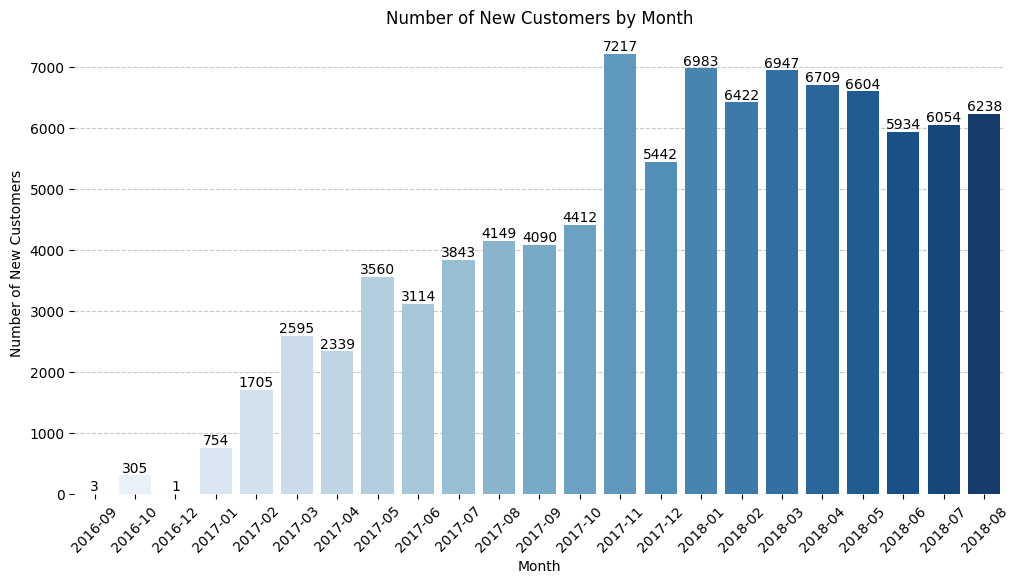

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(data=new_customer, x='first_purchase_month', y='count_customer', palette='Blues')

for index, row in new_customer.iterrows():
    plt.text(x=index,
             y=row['count_customer'] + 1,  # Đặt số liệu lên trên một chút
             s=int(row['count_customer']),
             ha='center', va='bottom')

plt.xticks(rotation=45)
plt.title('Number of New Customers by Month')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')

# Xóa khung biểu đồ
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# Đảm bảo gridline nằm phía sau biểu đồ
plt.gca().set_axisbelow(True)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')  # Gridline trên trục Y với nét đứt

plt.show()

Từ 01/2017 - 12/2017 số lượng khách hàng mới tăng trưởng đều đặn, trong đó 11/2017 số lượng khách hàng mới tăng đột biến do black friday
Từ 01/2018 - 01/2018 số lượng khách hàng mới có giảm nhẹ nhưng vẫn duy trì ở mức ổn định từ 6000-7000 khách hàng

In [ ]:
# state, city
top_state = df.groupby('customer_state').agg(count_customer=('customer_unique_id','nunique')).reset_index().sort_values(by = 'count_customer',ascending = False).head(10)

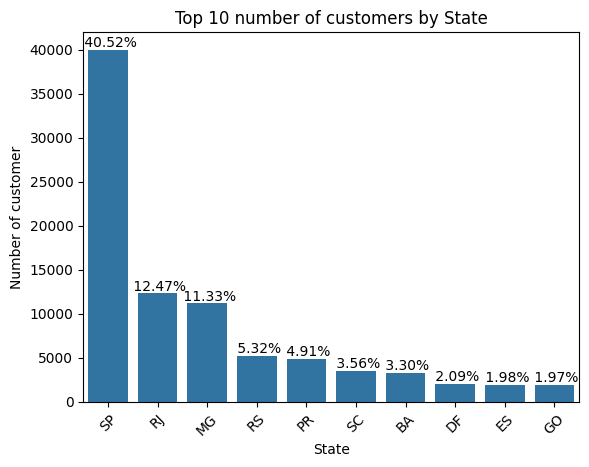

In [ ]:
ax = sns.barplot(data = top_state, x = 'customer_state',
            y = 'count_customer')
n =df ['customer_id'].nunique()
for p in ax.patches:
    ax.annotate(f'{100*int(p.get_height())/n: .2f}%',
              (p.get_x() + p.get_width()/ 2., p.get_height()),
              ha ='center', va = 'center',
              xytext = (0,5), textcoords = 'offset points')
plt.xticks(rotation = 45)
plt.title('Top 10 number of customers by State')
plt.xlabel('State')
plt.ylabel('Number of customer')
plt.show()

####   Top areas with the highest performance?

<ipython-input-30-fb78c94ed2e0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_city, y='customer_city', x='count_customer', palette='Blues')


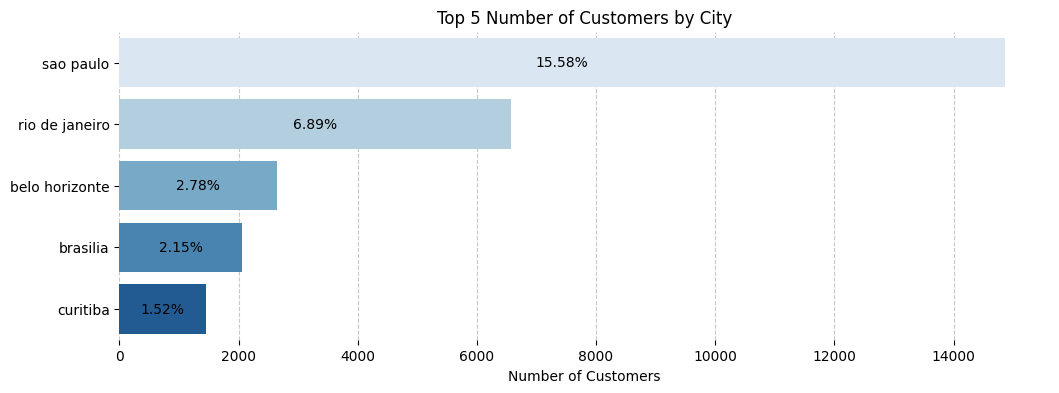

In [30]:
top_city = df.groupby('customer_city').agg(count_customer=('customer_unique_id','nunique')) \
             .reset_index().sort_values(by='count_customer', ascending=False).head(5)

plt.figure(figsize = (12,4))
ax = sns.barplot(data=top_city, y='customer_city', x='count_customer', palette='Blues')

n = df['customer_unique_id'].nunique()
for p in ax.patches:
    ax.text(p.get_width() / 2, p.get_y() + p.get_height() / 2,
            f'{100 * int(p.get_width()) / n:.2f}%',
            ha='center', va='center')

# Xóa khung biểu đồ
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# Thêm gridline theo chiều dọc
ax.set_axisbelow(True)  # Đưa gridline xuống dưới
plt.grid(True, linestyle='--', alpha=0.7, axis='x')  # Gridline dọc (trục X)

plt.title('Top 5 Number of Customers by City')
plt.xlabel('Number of Customers')
plt.ylabel('')

plt.show()

sao paulo là thành phố có số lượng khách hàng tập trung nhiều nhất 15.61%

In [ ]:
# Số lượng đơn hàng cuẩ từng sản phẩm
df.groupby('product_category_name_english').agg(count_order = ('order_id','nunique')).reset_index().sort_values(by = 'count_order',ascending = False)


,product_category_name_english,count_order
8,bed_bath_table,9417
44,health_beauty,8836
66,sports_leisure,7720
16,computers_accessories,6689
40,furniture_decor,6449
...,...,...
4,arts_and_craftmanship,23
53,la_cuisine,13
12,cds_dvds_musicals,12
30,fashion_childrens_clothes,8


<ipython-input-36-012279712ba8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_product,


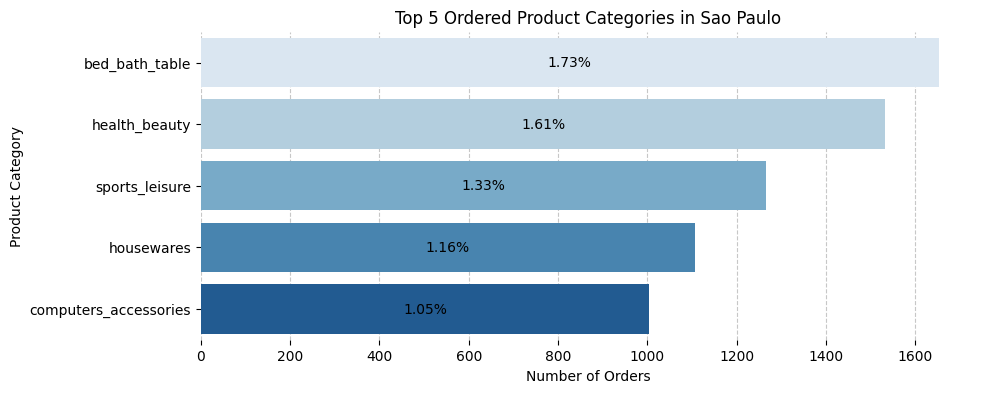

In [36]:
plt.figure(figsize=(10,4))

top_product = df[df['customer_city'] == 'sao paulo'] \
    .groupby('product_category_name_english') \
    .agg(count_order=('order_id', 'nunique')) \
    .reset_index() \
    .sort_values(by='count_order', ascending=False) \
    .head(5)

ax = sns.barplot(data=top_product,
                 y='product_category_name_english',
                 x='count_order',
                 palette='Blues')

# Thêm số liệu vào thanh biểu đồ
n = df['customer_unique_id'].nunique()
for p in ax.patches:
    ax.text(p.get_width() / 2, p.get_y() + p.get_height() / 2,
            f'{100 * int(p.get_width()) / n:.2f}%',
            ha='center', va='center')

# Xóa khung biểu đồ
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# Thêm gridline dọc (trục X)
ax.set_axisbelow(True)  # Đảm bảo gridline nằm phía sau cột
plt.grid(True, linestyle='--', alpha=0.7, axis='x')

plt.title('Top 5 Ordered Product Categories in Sao Paulo')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')

plt.show()

<ipython-input-40-c78f7e7cd4b2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_product,
<ipython-input-40-c78f7e7cd4b2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_product,
<ipython-input-40-c78f7e7cd4b2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_product,
<ipython-input-40-c78f7e7cd4b2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.ba

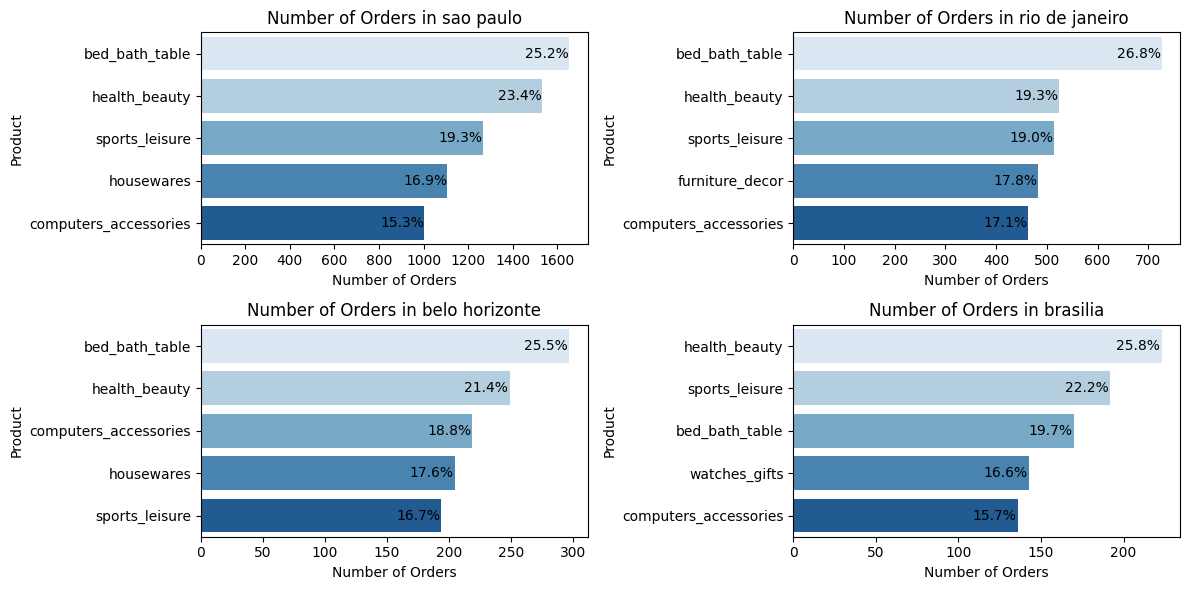

In [40]:
cities = ['sao paulo', 'rio de janeiro', 'belo horizonte', 'brasilia']

plt.figure(figsize=(12, 6))

for i, city in enumerate(cities, 1):
    plt.subplot(2, 2, i)

    # Lọc dữ liệu và tính số lượng đơn hàng theo danh mục sản phẩm
    top_product = df[df['customer_city'] == city] \
        .groupby('product_category_name_english') \
        .agg(count_order=('order_id', 'nunique')) \
        .reset_index() \
        .sort_values(by='count_order', ascending=False) \
        .head(5)

    total_orders = top_product['count_order'].sum()  # Tổng số đơn hàng trong top 5

    ax = sns.barplot(data=top_product,
                     y='product_category_name_english',
                     x='count_order',
                     palette='Blues')

    # Thêm số liệu phần trăm vào trong biểu đồ
    for p in ax.patches:
        percentage = 100 * p.get_width() / total_orders  # Tính phần trăm
        ax.text(p.get_width() - 1,  # Dịch số về bên trái một chút
                p.get_y() + p.get_height() / 2,
                f'{percentage:.1f}%',  # Hiển thị với 1 chữ số thập phân
                ha='right', va='center', color='black', fontsize=10)

    plt.xlabel('Number of Orders')
    plt.ylabel('Product')
    plt.title(f'Number of Orders in {city}')

plt.tight_layout()
plt.show()

#### Top merchants with the highest performance?

In [ ]:
# Số lượng đơn hàng
# Doanh thu
# Đánh giá của khách hàng
df_bed_bad_table = df[df['product_category_name_english'] == 'bed_bath_table']\
[['order_id','seller_id','payment_value','review_score']]
top_merchant = df_bed_bad_table.groupby('seller_id').agg(count_order=('order_id','nunique'),
                            revenue = ('payment_value','sum'),
                            score = ('review_score','mean')).reset_index()
top_merchant[(top_merchant['count_order']>top_merchant['count_order'].mean())
& (top_merchant['revenue']>top_merchant['revenue'].mean())].sort_values(by = 'score',ascending = False)\
  .head(5).style.background_gradient()

,seller_id,count_order,revenue,score
49,33a6f4b1e7cdc205511e76ba1b6e0186,94,16317.530000,4.303279
53,37be5a7c751166fbc5f8ccba4119e043,268,64314.430000,4.282686
1,00ee68308b45bc5e2660cd833c3f81cc,113,34337.630000,4.273292
91,640e21a7d01df7614a3b4923e990d40c,116,16449.490000,4.268116
30,1e8b33f18b4f7598d87f5cbee2282cc2,123,26148.210000,4.260000


In [ ]:
df_health_beauty = df[df['product_category_name_english'] == 'health_beauty']\
[['order_id','seller_id','payment_value','review_score']]
top_merchant = df_health_beauty.groupby('seller_id').agg(count_order=('order_id','nunique'),
                            revenue = ('payment_value','sum'),
                            score = ('review_score','mean')).reset_index()
top_merchant[(top_merchant['count_order']>top_merchant['count_order'].mean())
& (top_merchant['revenue']>top_merchant['revenue'].mean())].sort_values(by = 'score',ascending = False)\
  .head(5).style.background_gradient()

,seller_id,count_order,revenue,score
340,b1fecf4da1fa2689bccffa0121953643,19,4479.340000,4.966667
161,516e7738bd8f735ac19a010ee5450d8d,68,8572.430000,4.671053
217,6e386f64c84e482f0b9abf960797ee1b,30,13563.660000,4.607143
318,a5cba26a62b8b4d0145b68b841e62e7f,28,5901.520000,4.600000
202,679769a98cfcc6da877c8486ff1c13f3,21,7467.390000,4.571429


### Retain Existing Customers

#### Status of customer repeat purchases

In [44]:
from operator import attrgetter

df_selected_date = df[(df['order_purchase_timestamp']>='2018-01-01') &
                      (df['order_purchase_timestamp'] < '2019-01-01')]
df_first_purchase = df_selected_date.groupby('customer_unique_id')\
                    .agg(first_purchase_date = ('order_purchase_timestamp','min')).reset_index()
df_first_purchase['first_purchase_date'] = df_first_purchase['first_purchase_date'].dt.to_period('M')
df_selected_date = pd.merge(df_selected_date,df_first_purchase, on ='customer_unique_id', how = 'left')
df_selected_date
df_selected_date['current_month']= df_selected_date['order_purchase_timestamp'].dt.to_period('M')
df_selected_date['delta_month'] = (df_selected_date['current_month'] - df_selected_date['first_purchase_date']).apply(attrgetter('n'))
df_selected_date[df_selected_date['delta_month']>0]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,first_purchase_date,current_month,delta_month
58,003a7f59d7e08a9c61d9e2881fe6459c,1,a4d286543a67e29c930c99cbd7a55a8f,b410bdd36d5db7a65dcd42b7ead933b8,2018-08-22 11:49:46,119.00,15.28,f7838e5eeb3271df42376952e651e403,delivered,2018-08-19 12:51:50,...,housewares,71d5dd15707c2463aaf6bf469460337c,5.0,NaN,NaN,2018-08-28 00:00:00,2018-09-02 20:38:38,2018-02,2018-08,6
194,00c9d0257381c7e9ec13b4505f25b2cf,1,958cd4fc82ce0223c757f47bc9d67e23,abbf6046bbdf1028606a5bc7f00c99e7,2018-04-24 09:11:59,362.45,25.12,d14c86b99a98e85b5c256c081e3cea03,delivered,2018-04-18 08:57:18,...,auto,6d1a6be8fbfb1b9b4e0931a24cf0b914,5.0,NaN,NaN,2018-04-28 00:00:00,2018-04-29 17:29:01,2018-02,2018-04,2
198,00cee8a4dbb042385cbbd84699e78b2e,1,79e42c4fa2bde6e0c828d23c4fb7df35,6d66611d7c44cc30ce351abc49a68421,2018-07-26 04:25:10,59.90,9.17,450a869eb52446baa38f4beeecbc5843,delivered,2018-07-20 04:13:54,...,musical_instruments,a2937161bd6607b827771b6e47e9156e,5.0,Sim recomendo a loja,recebi o produto intacto,2018-07-26 00:00:00,2018-07-26 22:18:08,2018-06,2018-07,1
257,010efe60bdadc9261d1902f3c1dda5f3,1,fea7f0c147905a41ca324c0e3234a4c7,18a349e75d307f4b4cc646a691ed4216,2018-06-20 17:00:52,110.00,18.65,ac950cebc3bfe72c92a3768b6e8d3856,delivered,2018-06-07 16:46:09,...,computers_accessories,6ff0c3b38706728bce8d7f1390fba9be,4.0,Recomendo,"O produto atendeu as minhas expectativas, reco...",2018-06-16 00:00:00,2018-06-18 10:41:42,2018-04,2018-06,2
320,014bd8ca0827935402ac39f2751b2fcd,1,595fac2a385ac33a80bd5114aec74eb8,ef0ace09169ac090589d85746e3e036f,2018-05-15 13:11:00,119.90,15.72,9fa56e6eb804eb7f8c2d80a133c84546,delivered,2018-05-09 12:47:39,...,perfumery,b7705d1881618b1682a2c5cb0e358311,2.0,NaN,NaN,2018-05-17 00:00:00,2018-05-21 15:30:21,2018-01,2018-05,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63220,fdff9c6a7acb0e02d1cea8d18811e251,1,936a034fe3b07b7ae7c87fc8ceb0749d,6560211a19b47992c3666cc44a7e94c0,2018-06-21 14:31:59,249.00,9.90,eddc5297a74164ee82529b15e8357af7,delivered,2018-06-19 14:10:30,...,watches_gifts,ca60eff83a41f5db6c9eef93a0276829,5.0,NaN,NaN,2018-06-22 00:00:00,2018-06-22 22:25:28,2018-05,2018-06,1
63373,fe98cb0615a7611265d8955be5ca9497,1,e950f579a1170b4e385f734c5771e9f4,c5f7feb04a6a1fb3596322bfc3cf1917,2018-08-09 20:35:25,37.90,16.46,3b11d54278a86bfa191ef947e654c9cb,delivered,2018-08-01 17:13:52,...,furniture_decor,91178de0274f6a2d33925b62b2064b35,5.0,NaN,NaN,2018-08-11 00:00:00,2018-08-12 00:10:44,2018-07,2018-08,1
63376,fe9a7e2176f05d248141c7d1493f19bb,1,8cef0a48dd6a31a4da7683d1f35d8925,d94a40fd42351c259927028d163af842,2018-02-14 20:29:07,129.00,18.52,b71118b9a56b7671a08f7d317fe361c5,delivered,2018-02-08 20:12:55,...,housewares,8dc37fa7d6ac644151487effe48b6fad,5.0,NaN,NaN,2018-02-25 00:00:00,2018-02-27 10:38:06,2018-01,2018-02,1
63380,fe9d34568d9ac7651ff018def29da70f,1,ba74c6b75d2ad7503175809688d5a03c,7d13fca15225358621be4086e1eb0964,2018-05-17 02:57:34,178.99,41.40,419de035a0a31527733258cce22a7bff,delivered,2018-05-10 03:38:27,...,watches_gifts,ecff7af4e0cd8242cd8102a2d3572ef5,4.0,bom,"Recebi, tudo ótimo.",2018-06-05 00:00:00,2018-06-08 13:58:33,2018-03,2018-05,2


In [45]:
df_cohort = df_selected_date.groupby(['first_purchase_date','delta_month']).agg(count_customer = ('customer_unique_id','nunique')).reset_index()

In [46]:
df_cohort_pivot = (
    df_cohort\
    .pivot_table(index = 'first_purchase_date',
                 columns = 'delta_month',
                 values = 'count_customer')
)
df_cohort_pivot

delta_month,0,1,2,3,4,5,6,7
first_purchase_date,,,,,,,,
2018-01,7120.0,28.0,28.0,25.0,22.0,15.0,14.0,17.0
2018-02,6509.0,26.0,26.0,22.0,19.0,14.0,13.0,NaN
2018-03,7042.0,34.0,22.0,23.0,11.0,9.0,NaN,NaN
2018-04,6793.0,40.0,22.0,18.0,11.0,NaN,NaN,NaN
2018-05,6689.0,36.0,20.0,15.0,NaN,NaN,NaN,NaN
2018-06,6006.0,25.0,17.0,NaN,NaN,NaN,NaN,NaN
2018-07,6109.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08,6297.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
for col in df_cohort_pivot.columns[1:]:
    df_cohort_pivot[col] = df_cohort_pivot[col]/df_cohort_pivot[0]
df_cohort_pivot[0] = 1
df_cohort_pivot

delta_month,0,1,2,3,4,5,6,7
first_purchase_date,,,,,,,,
2018-01,1,0.003933,0.003933,0.003511,0.003090,0.002107,0.001966,0.002388
2018-02,1,0.003994,0.003994,0.003380,0.002919,0.002151,0.001997,NaN
2018-03,1,0.004828,0.003124,0.003266,0.001562,0.001278,NaN,NaN
2018-04,1,0.005888,0.003239,0.002650,0.001619,NaN,NaN,NaN
2018-05,1,0.005382,0.002990,0.002242,NaN,NaN,NaN,NaN
2018-06,1,0.004163,0.002831,NaN,NaN,NaN,NaN,NaN
2018-07,1,0.005238,NaN,NaN,NaN,NaN,NaN,NaN
2018-08,1,0.000159,NaN,NaN,NaN,NaN,NaN,NaN


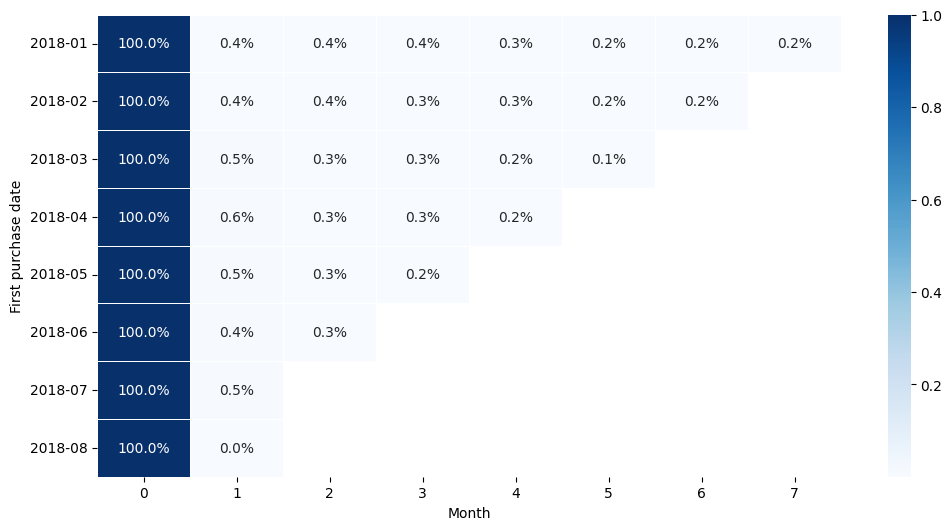

In [53]:
plt.figure(figsize = (12,6))
sns.heatmap(data = df_cohort_pivot, annot = True, fmt = '.1%', cmap='Blues', linewidths=0.5,
                 cbar=True)
plt.ylabel('First purchase date')
plt.xlabel('Month')
plt.yticks(rotation = 0)
plt.show()

#### Delivery time
order_purchase_timestamp: Timestamp of the purchase

order_approved_at: Timestamp of the order approval

order_delivered_carrier_date: Delivery date at which carrier made the delivery

order_delivered_customer_date: Date at which customer got the product

order_estimated_delivery_date: estimated delivery date of the products

shipping_limit_date: The date before which shipping of the ordered product must be completed


In [55]:
# thời gian hàng có tác động đến sự hài lòng của KH không?
# Tỉ lệ ontime và late như thế nào?
# thời gian giao hàng có cải thiện qua từng năm hay không?

df['dispatch_time'] = (df['order_delivered_carrier_date'] - df['order_approved_at']).dt.days
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days
df['actual_vs_estimated_dispatched_time'] = (df['order_delivered_carrier_date'] - df['shipping_limit_date']).dt.days
df['actual_vs_estimated_delivery_time'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

In [56]:
df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,dispatch_time,delivery_time,actual_vs_estimated_dispatched_time,actual_vs_estimated_delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,6.0,1.0,0.0,-9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,8.0,8.0,1.0,-3
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,1.0,6.0,-3.0,-14
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,2.0,4.0,-5.0,-6
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,11.0,13.0,2.0,-16


In [57]:
def ontime_or_late(x):
   if x>0:
      return 'late'
   else:
      return 'ontime'
df['actual_vs_estimated_dispatched_time'] = df['actual_vs_estimated_dispatched_time'].apply(ontime_or_late)
df['actual_vs_estimated_delivery_time'] = df['actual_vs_estimated_delivery_time'].apply(ontime_or_late)

In [58]:
df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,dispatch_time,delivery_time,actual_vs_estimated_dispatched_time,actual_vs_estimated_delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,6.0,1.0,ontime,ontime
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,8.0,8.0,late,ontime


In [59]:
df['total_time'] = df['dispatch_time']+df['delivery_time']

<ipython-input-60-6cb8b95816b3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df[df['total_time'] < df['total_time'].quantile(0.95)],


<Axes: xlabel='review_score', ylabel='total_time'>

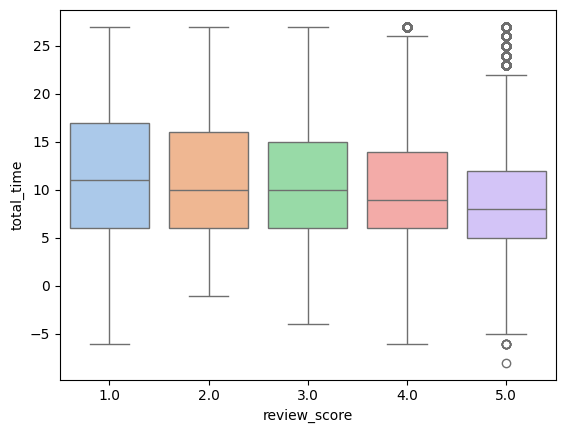

In [60]:
sns.boxplot(data = df[df['total_time'] < df['total_time'].quantile(0.95)],
            x = 'review_score',
            y = 'total_time',
            palette = 'pastel')

In [ ]:
# loại bỏ outlier
# IQR
# quantitle(0.05) <x < quantitle (0.95)

In [61]:
df[df['total_time'] < df['total_time'].quantile(0.95)]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,dispatch_time,delivery_time,actual_vs_estimated_dispatched_time,actual_vs_estimated_delivery_time,total_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,6.0,1.0,ontime,ontime,7.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,8.0,8.0,late,ontime,16.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,1.0,6.0,ontime,ontime,7.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,2.0,4.0,ontime,ontime,6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,11.0,13.0,late,ontime,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117599,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,5.0,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47,0.0,15.0,ontime,ontime,15.0
117600,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,5.0,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29,0.0,6.0,ontime,ontime,6.0
117601,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,5.0,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52,1.0,1.0,ontime,ontime,2.0
117602,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,5.0,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05,0.0,1.0,ontime,ontime,1.0


In [62]:
# actual_vs_estimated_dispatched_time vs actual_vs_estimated_delivery_time
actual_vs_estimated_dispatched_time = df.groupby('actual_vs_estimated_dispatched_time').agg(count = ('order_id','nunique')).reset_index()

<ipython-input-63-dae92274a431>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = actual_vs_estimated_dispatched_time,


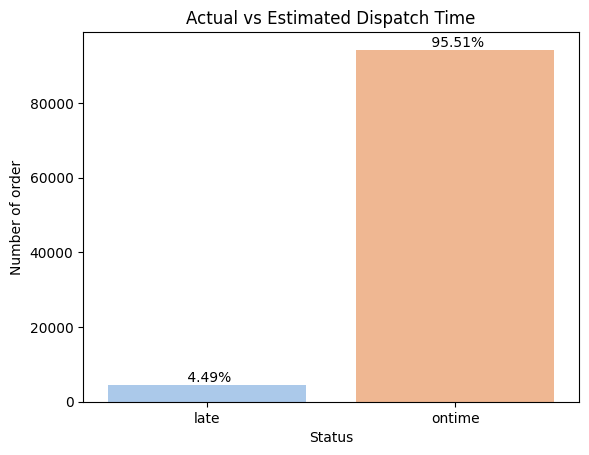

In [63]:
ax = sns.barplot(data = actual_vs_estimated_dispatched_time,
            x = 'actual_vs_estimated_dispatched_time',
            y = 'count',
            palette = 'pastel')
n =df['order_id'].nunique()
for p in ax.patches:
    ax.annotate(f'{100*int(p.get_height())/n: .2f}%',
              (p.get_x() + p.get_width()/ 2., p.get_height()),
              ha ='center', va = 'center',
              xytext = (0,5), textcoords = 'offset points')
#plt.xticks(rotation = 45)
plt.title('Actual vs Estimated Dispatch Time')
plt.xlabel('Status')
plt.ylabel('Number of order')
plt.show()

In [64]:
actual_vs_estimated_delivery_time = df.groupby('actual_vs_estimated_delivery_time').agg(count = ('order_id','nunique')).reset_index()

<ipython-input-65-aa85728039fc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = actual_vs_estimated_delivery_time,


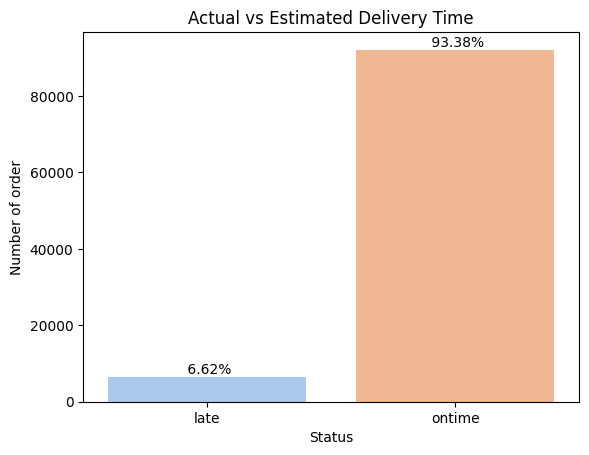

In [65]:
ax = sns.barplot(data = actual_vs_estimated_delivery_time,
            x = 'actual_vs_estimated_delivery_time',
            y = 'count',
            palette = 'pastel')
n =df['order_id'].nunique()
for p in ax.patches:
    ax.annotate(f'{100*int(p.get_height())/n: .2f}%',
              (p.get_x() + p.get_width()/ 2., p.get_height()),
              ha ='center', va = 'center',
              xytext = (0,5), textcoords = 'offset points')
#plt.xticks(rotation = 45)
plt.title('Actual vs Estimated Delivery Time')
plt.xlabel('Status')
plt.ylabel('Number of order')
plt.show()

<ipython-input-73-11df3dd28619>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=actual_vs_estimated_dispatched_time,
<ipython-input-73-11df3dd28619>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=actual_vs_estimated_delivery_time,


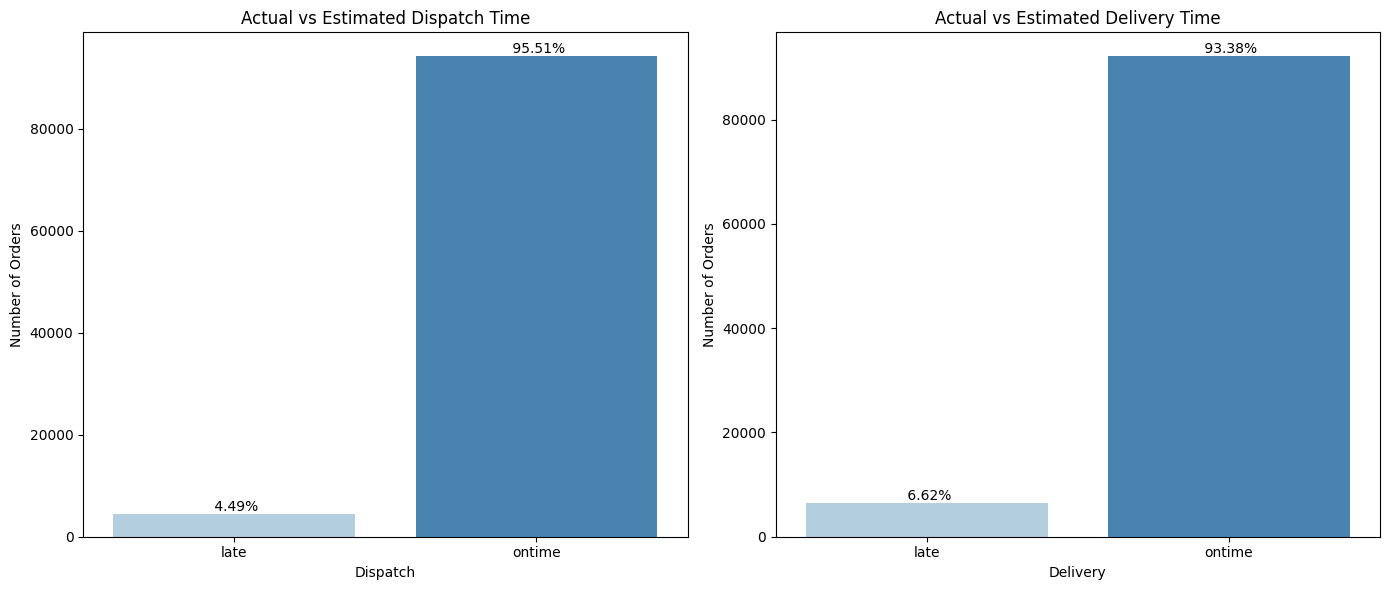

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ Actual vs Estimated Dispatch Time
ax1 = sns.barplot(data=actual_vs_estimated_dispatched_time,
                  x='actual_vs_estimated_dispatched_time',
                  y='count',
                  palette='Blues', ax=axes[0])

n = df['order_id'].nunique()
for p in ax1.patches:
    ax1.annotate(f'{100 * int(p.get_height()) / n: .2f}%',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5), textcoords='offset points')

ax1.set_title('Actual vs Estimated Dispatch Time')
ax1.set_xlabel('Dispatch')
ax1.set_ylabel('Number of Orders')

# Biểu đồ Actual vs Estimated Delivery Time
ax2 = sns.barplot(data=actual_vs_estimated_delivery_time,
                  x='actual_vs_estimated_delivery_time',
                  y='count',
                  palette='Blues', ax=axes[1])

for p in ax2.patches:
    ax2.annotate(f'{100 * int(p.get_height()) / n: .2f}%',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5), textcoords='offset points')

ax2.set_title('Actual vs Estimated Delivery Time')
ax2.set_xlabel('Delivery')
ax2.set_ylabel('Number of Orders')

# Hiển thị
plt.tight_layout()
plt.show()

In [66]:
df['year'] = df['order_purchase_timestamp'].dt.year

In [67]:
# thời gian giao hàng qua mỗi năm ra sao
df.groupby('year').agg(mean = ('total_time','mean')).reset_index()

,year,mean
0,2016,19.857550
1,2017,11.684832
2,2018,10.816338


<ipython-input-68-8a6f0252ac2a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df.groupby('year').agg(mean = ('total_time','mean')).reset_index(),


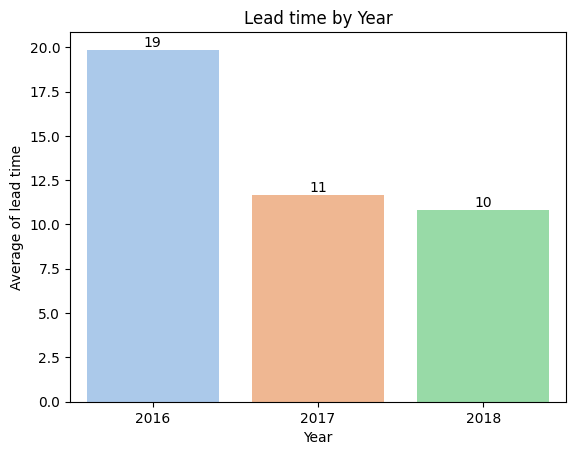

In [68]:
ax = sns.barplot(data = df.groupby('year').agg(mean = ('total_time','mean')).reset_index(),
            x = 'year',
            y = 'mean',
            palette = 'pastel')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
              (p.get_x() + p.get_width()/ 2., p.get_height()),
              ha ='center', va = 'center',
              xytext = (0,5), textcoords = 'offset points')
#plt.xticks(rotation = 45)
plt.title('Lead time by Year')
plt.xlabel('Year')
plt.ylabel('Average of lead time')
plt.show()

(-10.0, 100.0)

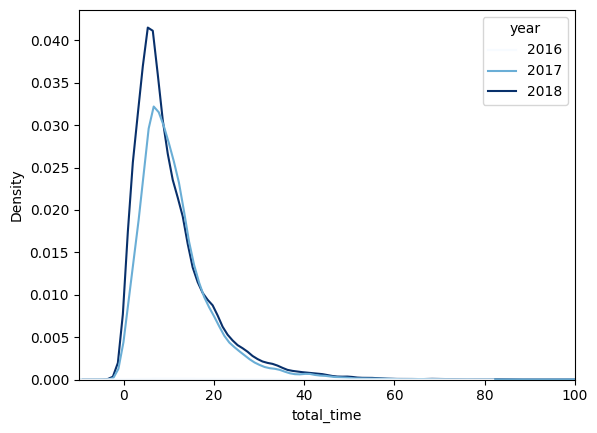

In [70]:
sns.kdeplot(data = df,
            x ='total_time',
            hue = 'year',
            palette = 'Blues')
plt.xlim(-10,100)

In [ ]:
df[df['total_time']<0][['order_approved_at','order_delivered_carrier_date']]

,order_approved_at,order_delivered_carrier_date
679,2017-09-13 22:17:15,2017-09-04 14:05:50
1996,2018-07-05 16:40:30,2018-07-03 13:12:00
5411,2018-07-05 16:23:33,2018-07-04 15:36:00
6419,2018-07-05 16:25:45,2018-07-03 14:36:00
7199,2018-04-24 19:04:29,2018-04-23 19:04:00
...,...,...
113824,2018-07-05 16:04:38,2018-07-04 08:02:00
115097,2018-07-27 23:30:58,2018-07-24 14:38:00
115144,2018-04-24 18:25:30,2018-04-23 23:35:37
116102,2018-04-24 18:41:20,2018-04-23 21:58:45


##### Dispatch Time( Seller)


<ipython-input-76-207024301c6a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=avg_dispatch_time,


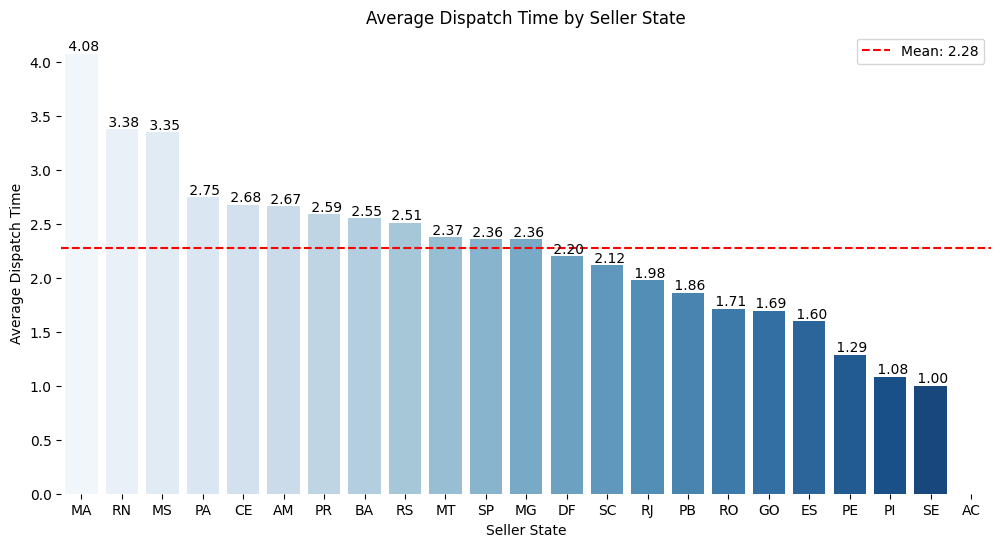

In [76]:
# Thời gian chuẩn bị 1 đơn hàng trung bình
avg_dispatch_time = df.groupby('seller_state').agg(avg_dispatch_time=('dispatch_time', 'mean')).reset_index() \
    .sort_values(by='avg_dispatch_time', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=avg_dispatch_time,
                 x='seller_state',
                 y='avg_dispatch_time',
                 palette = 'Blues')

# Thêm số liệu vào trong các cột
for p in ax.patches:
    ax.annotate(f'{(p.get_height()): .2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

# Xóa khung biểu đồ
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# Thêm đường average line (giữa các giá trị dispatch time)
average_value = avg_dispatch_time['avg_dispatch_time'].mean()
ax.axhline(average_value, color='red', linestyle='--', label=f'Mean: {average_value:.2f}')

# Thêm chú thích cho đường trung bình
ax.legend()

# Cài đặt tiêu đề và nhãn trục
plt.title('Average Dispatch Time by Seller State')
plt.xlabel('Seller State')
plt.ylabel('Average Dispatch Time')

# Hiển thị biểu đồ
plt.show()

<Axes: xlabel='seller_state', ylabel='dispatch_time'>

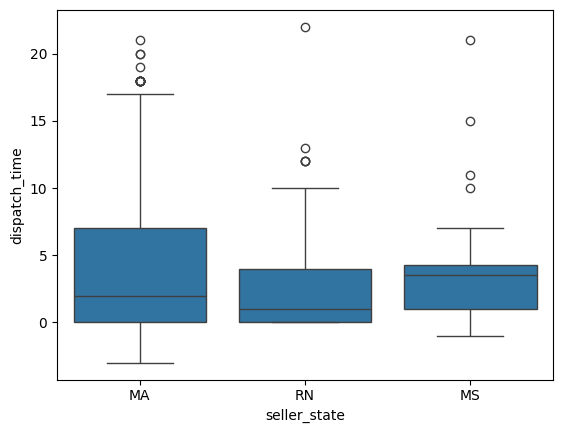

In [ ]:
df[df['seller_state'].isin(['MA','RN','MS'])]
sns.boxplot(data = df[df['seller_state'].isin(['MA','RN','MS'])],
            x = 'seller_state',
            y = 'dispatch_time')

In [ ]:
df[(df['seller_state'] == 'MA') & (df['dispatch_time']>15)][['product_category_name_english','seller_id']].value_counts()

,,count
product_category_name_english,seller_id,
health_beauty,06a2c3af7b3aee5d69171b0e14f0ee87,21


In [ ]:
df[(df['seller_state'] == 'RN') & (df['dispatch_time']>10)][['product_category_name_english','seller_id']].value_counts()

,,count
product_category_name_english,seller_id,
furniture_decor,02d35243ea2e497335cd0f076b45675d,5


In [ ]:
# Seller nào đang trong tình trạng cảnh báo về thời gian chuẩn bị đơn hàng

sellers = df[['order_id','seller_id','payment_value']].drop_duplicates().groupby('seller_id').agg(count_order = ('order_id','nunique'),
                             revenue = ('payment_value','sum'))
sellers_late_time =df[df['actual_vs_estimated_dispatched_time'] == 'late'].groupby('seller_id').agg(late_count = ('order_id','nunique'))
sellers = pd.merge(sellers, sellers_late_time, on ='seller_id', how = 'left').fillna(0)
sellers['late_rate'] = 100*sellers['late_count']/sellers['count_order']

In [ ]:
sellers_late = sellers[(sellers['count_order'] >=sellers['count_order'].mean()) &\
(sellers['revenue'] >=sellers['revenue'].mean())].reset_index().sort_values(by ='late_rate', ascending = False).head(10)
sellers_late[['seller_id','count_order','revenue','late_rate']].style.background_gradient()

,seller_id,count_order,revenue,late_rate
248,835f0f7810c76831d6c7d24c7a646d4d,44,6287.570000,59.090909
154,54965bbe3e4f07ae045b90b0b8541f52,78,13531.060000,42.307692
65,1da366cade6d8276e7d8beea7af5d4bf,43,8722.760000,41.860465
307,a49928bcdf77c55c6d6e05e09a9b4ca5,98,10664.580000,40.816327
310,a7f13822ceb966b076af67121f87b063,75,15595.120000,40.000000
259,88460e8ebdecbfecb5f9601833981930,248,40213.380000,39.516129
247,834f8533b2ecb6598dd004ff3de7203a,43,5636.240000,34.883721
322,ad781527c93d00d89a11eecd9dcad7c1,44,10094.610000,31.818182
360,c60b801f2d52c7f7f91de00870882a75,41,14205.030000,31.707317
75,23613d49c3ac2bd302259e55c06c050c,70,7357.130000,30.000000


##### Deliver Time( Customer)

In [78]:
# Thời gian giao hàng trung bình tại mỗi khu vực
avg_delivery_time =df.groupby('customer_state').agg(avg_delivery_time = ('delivery_time','mean')).reset_index()\
                   .sort_values(by = 'avg_delivery_time',ascending = False)
avg_delivery_time

,customer_state,avg_delivery_time
21,RR,24.784314
3,AP,24.048193
2,AM,23.450292
1,AL,20.617778
13,PA,20.054905
9,MA,17.586412
24,SE,17.426768
5,CE,17.242051
0,AC,17.115789
14,PB,16.698738


<ipython-input-82-567d45e140c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=avg_delivery_time,


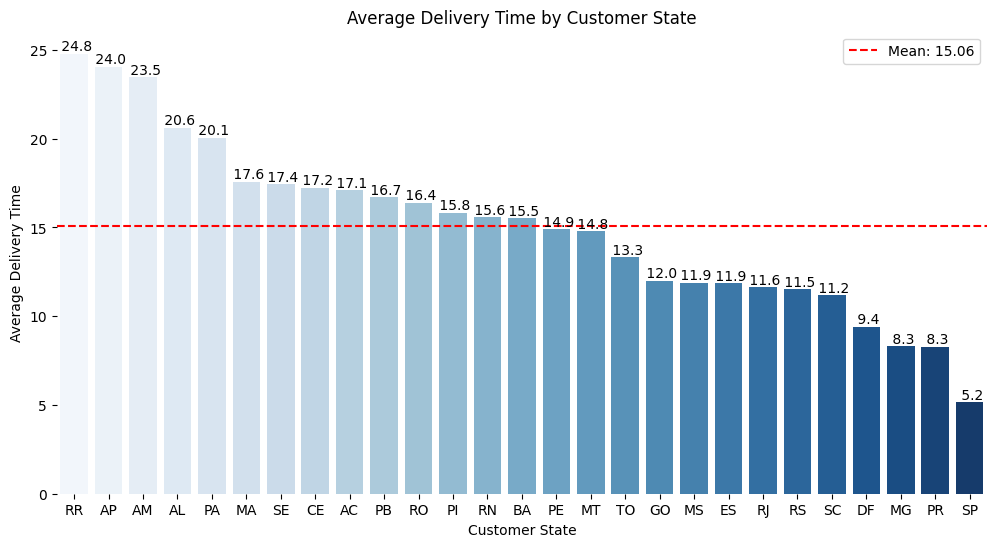

In [82]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=avg_delivery_time,
                 x='customer_state',
                 y='avg_delivery_time',
                 palette = 'Blues')

# Thêm số liệu vào trong các cột
for p in ax.patches:
    ax.annotate(f'{(p.get_height()): .1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

# Xóa khung biểu đồ
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# Thêm đường average line (giữa các giá trị avg_delivery_time)
average_value = avg_delivery_time['avg_delivery_time'].mean()
ax.axhline(average_value, color='red', linestyle='--', label=f'Mean: {average_value:.2f}')

# Thêm chú thích cho đường trung bình
ax.legend()

# Cài đặt tiêu đề và nhãn trục
plt.title('Average Delivery Time by Customer State')
plt.xlabel('Customer State')
plt.ylabel('Average Delivery Time')

# Hiển thị biểu đồ
plt.show()

In [85]:
# Tỉ lệ late và ontime theo từng khu vực
ontime_late_customer_state = (df.groupby('customer_state')['actual_vs_estimated_delivery_time'].value_counts(normalize = True)*100).reset_index()
ontime_late_customer_state['proportion'] = ontime_late_customer_state['proportion'].round(2)
ontime_late_customer_state = ontime_late_customer_state.sort_values( by = 'proportion')

In [86]:
ontime_late_customer_state.head(2)

,customer_state,actual_vs_estimated_delivery_time,proportion
5,AM,late,2.92
1,AC,late,3.16


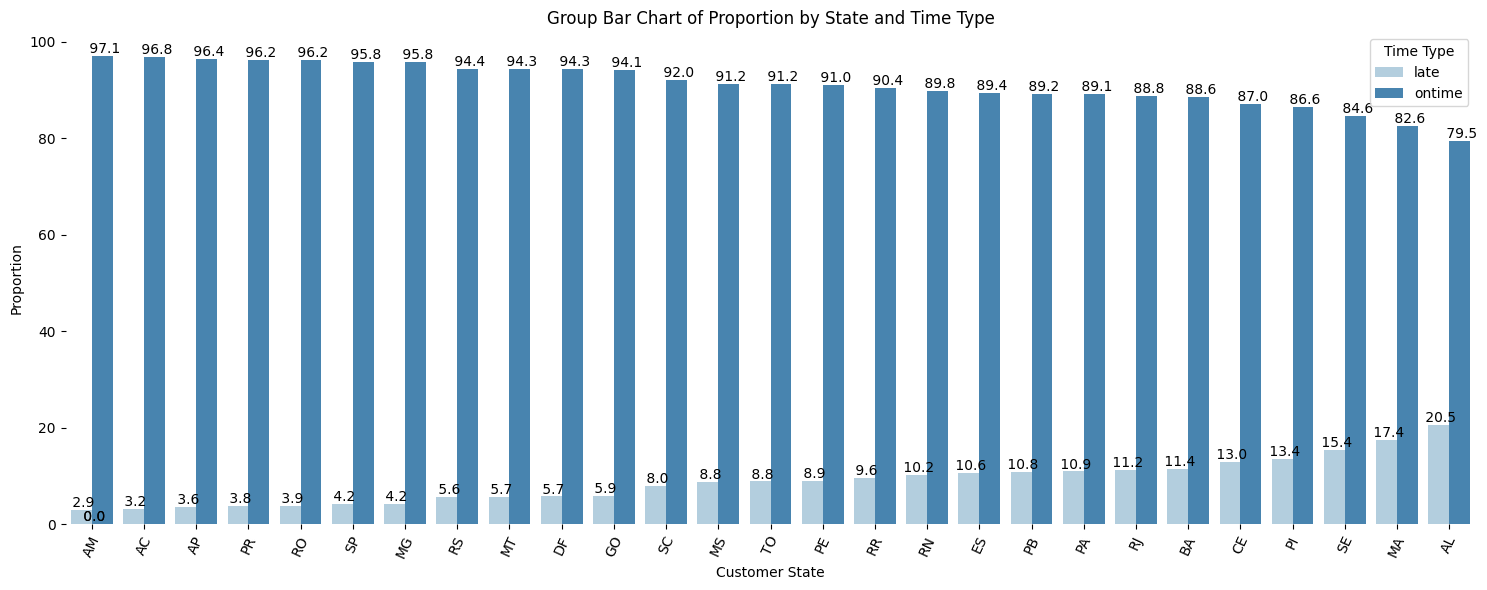

In [88]:
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=ontime_late_customer_state,
                 x='customer_state',
                 y='proportion',
                 hue='actual_vs_estimated_delivery_time',
                 palette='Blues')

# Thêm số liệu vào trong các cột
for p in ax.patches:
    ax.annotate(f'{(p.get_height()): .1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

# Xoá khung biểu đồ
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# Cài đặt các yếu tố khác của biểu đồ
plt.xticks(rotation=65)
plt.legend(title='Time Type')
plt.title('Group Bar Chart of Proportion by State and Time Type')
plt.xlabel('Customer State')
plt.ylabel('Proportion')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

#### Which payment method has the lowest success rate?

In [89]:
payment_method = df[['order_id','payment_type','payment_value']].drop_duplicates().groupby('payment_type').agg(count_order = ('order_id', 'nunique'),revenue = ('payment_value','sum')).reset_index()

<ipython-input-90-d77e4b7b8c3c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = payment_method, x = 'payment_type',


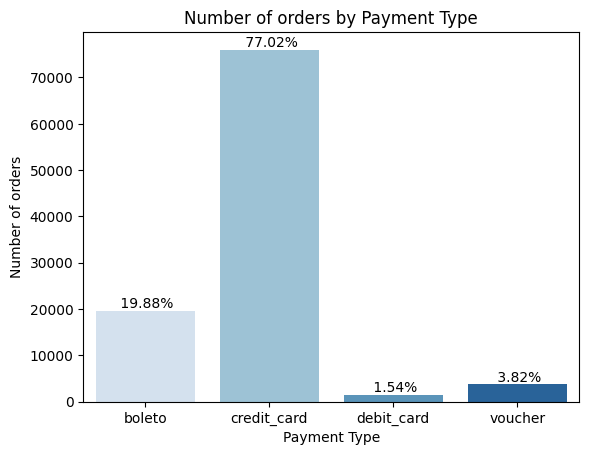

In [90]:
ax = sns.barplot(data = payment_method, x = 'payment_type',
            y = 'count_order',
            palette = 'Blues')
n =df['order_id'].nunique()
for p in ax.patches:
    ax.annotate(f'{100*int(p.get_height())/n: .2f}%',
              (p.get_x() + p.get_width()/ 2., p.get_height()),
              ha ='center', va = 'center',
              xytext = (0,5), textcoords = 'offset points')
#plt.xticks(rotation = 45)
plt.title('Number of orders by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of orders')
plt.show()

In [ ]:
# Tỉ lệ thanh thoán success và unsuccess
df['order_status'].value_counts()

,count
order_status,
delivered,115038
shipped,1244
canceled,566
processing,375
invoiced,371
unavailable,7
approved,3


In [ ]:
def payment_status(x):
    if x in ['unavailable','canceled']:
      return 'unsuccess'
    else:
      return 'success'
df['payment_status'] = df['order_status'].apply(payment_status)
df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_comment_message,review_creation_date,review_answer_timestamp,dispatch_time,delivery_time,actual_vs_estimated_dispatched_time,actual_vs_estimated_delivery_time,total_time,year,payment_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,6.0,1.0,ontime,ontime,7.0,2017,success
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,8.0,8.0,late,ontime,16.0,2017,success


In [ ]:
payment_failure = df[df['payment_status'] == 'unsuccess'].groupby('payment_type').agg(count_failure =('order_id','nunique')).reset_index()

In [ ]:
payment_rate = pd.merge(payment_method, payment_failure, on = 'payment_type', how = 'left')

payment_rate['failure_rate']=100*payment_rate['count_failure']/ payment_rate['count_order']
payment_rate = payment_rate[['payment_type', 'count_order', 'revenue', 'failure_rate']]
payment_rate.style.background_gradient()

,payment_type,count_order,revenue,failure_rate
0,boleto,19614,4059699.600000,0.402774
1,credit_card,75991,15589028.220000,0.496111
2,debit_card,1521,253533.860000,0.394477
3,voucher,3766,405873.030000,0.557621


## Opportunity 2: Increase order frequency

### Orders Quantity Distribution

In [92]:
# Số lượng orders theo ngày
df['date'] = df['order_purchase_timestamp'].dt.date

In [93]:
df.groupby('date').agg(count_order = ('order_id','nunique')).reset_index()

,date,count_order
0,2016-09-04,1
1,2016-09-05,1
2,2016-09-15,1
3,2016-10-02,1
4,2016-10-03,8
...,...,...
611,2018-08-26,73
612,2018-08-27,66
613,2018-08-28,39
614,2018-08-29,11


Text(0.5, 0, 'Number of Orders')

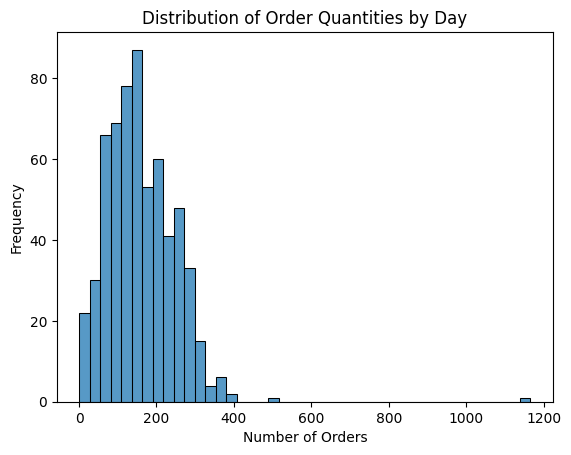

In [94]:
sns.histplot(data = df.groupby('date').agg(count_order = ('order_id','nunique')).reset_index(),
             x = 'count_order')
plt.title('Distribution of Order Quantities by Day')
plt.ylabel('Frequency')
plt.xlabel('Number of Orders')

Số lương đơn hàng từng ngày có range từ 0-1200 đơn, tuy nhiên tập trung chủ yếu 50-200 đơn

### Time frame with a high order volume trend

In [95]:
# ngày nào trong tuần? giờ nào trong nào?
df['day_of_week'] = df['order_purchase_timestamp'].dt.day_of_week
df['day_name'] = df['order_purchase_timestamp'].dt.strftime('%a')
df['hour'] = df['order_purchase_timestamp'].dt.hour

In [96]:
order_frequency = df.groupby(['day_name','hour','day_of_week']).agg(count_order = ('order_id','nunique')).reset_index()

In [97]:
order_frequency = order_frequency.set_index('day_name')

In [98]:
order_frequency_pivot = (
    order_frequency\
    .pivot_table(index = ['day_name', 'day_of_week'],
                 columns = 'hour',
                 values = 'count_order')
)
order_frequency_pivot = order_frequency_pivot.sort_values(by='day_of_week').reset_index().drop(columns = 'day_of_week')
order_frequency_pivot = order_frequency_pivot.set_index('day_name')

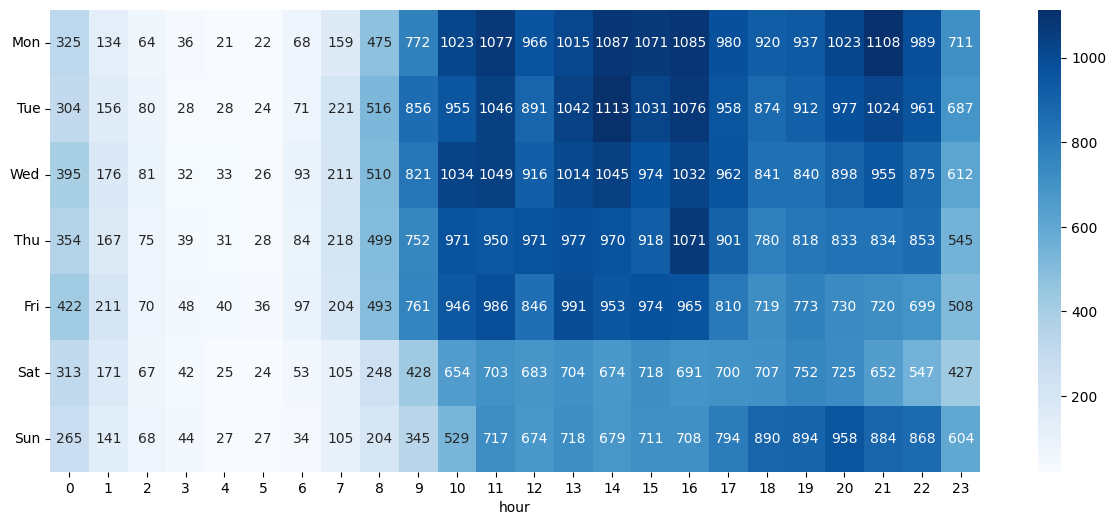

In [100]:
plt.figure(figsize = (15,6))
sns.heatmap(data = order_frequency_pivot,
            annot = True,
            fmt = '.0f',
            cmap='Blues')
plt.ylabel('')
plt.xlabel('hour')
plt.yticks(rotation = 0)
plt.show()

Hầu hết các đơn hàng được đặt trong các ngày trong tuần từ 10h sáng đến 4h chiều, với 1 sự giảm nhẹ doanh số vào khoảng 12h trưa do nghỉ trưa

Khách hàng cũng thường đặt qua Olist buổi tối khoảng 9h tối từ chủ nhật tới thứ năm

Thời gian ít hoạt động nhất là từ 2h sáng đến 6h sáng

### RFM customer segmentation

Recency: How recently did the customer place the last order?

Frequency: How often does the customer place orders?

Monetary value: How much does the customer spend on average?

In [ ]:
recency_cust = df.groupby('customer_unique_id').agg(max_order_purchase_timestamp = ('order_purchase_timestamp','max')).reset_index()
recency_cust['recency'] = (pd.to_datetime('2018-09-01')-recency_cust['max_order_purchase_timestamp']).dt.days
recency_cust

,customer_unique_id,max_order_purchase_timestamp,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,116
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,539
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,323
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,290
...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,449
95416,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,264
95417,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,570
95418,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,121


In [ ]:
frequency_cust = df.groupby('customer_unique_id').agg(frequency = ('order_id','nunique')).reset_index()
frequency_cust

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,1
95416,fffea47cd6d3cc0a88bd621562a9d061,1
95417,ffff371b4d645b6ecea244b27531430a,1
95418,ffff5962728ec6157033ef9805bacc48,1


In [ ]:

monetary_cust = df[['order_id','customer_unique_id','payment_value']].drop_duplicates().groupby('customer_unique_id').agg(monetary = ('payment_value','sum')).reset_index()
monetary_cust

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
95416,fffea47cd6d3cc0a88bd621562a9d061,84.58
95417,ffff371b4d645b6ecea244b27531430a,112.46
95418,ffff5962728ec6157033ef9805bacc48,133.69


In [ ]:
rf = pd.merge(recency_cust, frequency_cust, on = 'customer_unique_id', how = 'inner')
rfm = pd.merge(rf, monetary_cust, on = 'customer_unique_id', how = 'inner')
rfm

,customer_unique_id,max_order_purchase_timestamp,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,116,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,539,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,323,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,290,1,196.89
...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,449,1,2067.42
95416,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,264,1,84.58
95417,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,570,1,112.46
95418,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,121,1,133.69


Text(0.5, 0, '')

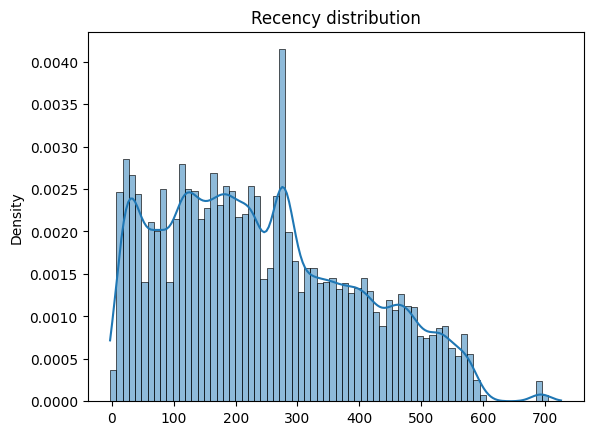

In [ ]:
sns.histplot(data = rfm,
            x = 'recency',
            kde = True,
            stat = 'density')
plt.title('Recency distribution')
plt.xlabel(None)

Text(0.5, 0, '')

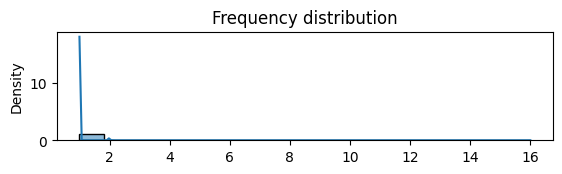

In [ ]:
plt.subplot(3,1,2)
sns.histplot(data = rfm,
             x = 'frequency',
             kde = True,
             stat = 'density')
plt.title('Frequency distribution')
plt.xlabel(None)

Text(0.5, 0, '')

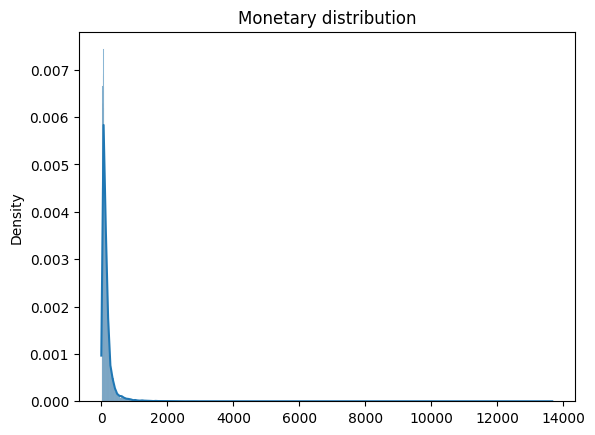

In [ ]:
sns.histplot(data = rfm,
            x = 'monetary',
            kde = True,
            stat = 'density')
plt.title('Monetary distribution')
plt.xlabel(None)

In [ ]:
rfm[rfm['monetary']>100000]

,customer_unique_id,max_order_purchase_timestamp,recency,frequency,monetary
3799,0a0a92112bd4c708ca5fde585afaa872,2017-09-29 15:24:52,336,1,109312.64


In [ ]:
df[df['customer_unique_id'] == '0a0a92112bd4c708ca5fde585afaa872']['payment_value']

,payment_value
1690,13664.08
1691,13664.08
1692,13664.08
1693,13664.08
1694,13664.08
1695,13664.08
1696,13664.08
1697,13664.08


In [ ]:
r_quantiles = np.percentile(rfm['recency'],[20,40,60,80])
f_quantiles = np.percentile(rfm['frequency'],[20,40,60,80])
m_quantiles = np.percentile(rfm['monetary'],[20,40,60,80])
r_quantiles

array([ 95., 179., 270., 386.])

In [ ]:
def RScore(x,quantiles):
    if x <=quantiles[0]: # Dùng phân vị 20% (index 0 )
       return 5
    elif x <=quantiles[1]: # Dùng phân vị 40% (index 1 )
       return 4
    elif x <=quantiles[2]: # Dùng phân vị 60% (index 2 )
       return 3
    elif x <=quantiles[3]: # Dùng phân vị 80% (index 3 )
       return 2
    else:
       return 1

In [ ]:
def FMScore(x,quantiles):
    if x <=quantiles[0]: # Dùng phân vị 20% (index 0 )
       return 1
    elif x <=quantiles[1]: # Dùng phân vị 40% (index 1 )
       return 2
    elif x <=quantiles[2]: # Dùng phân vị 60% (index 2 )
       return 3
    elif x <=quantiles[3]: # Dùng phân vị 80% (index 3 )
       return 4
    else:
       return 5

In [ ]:
rfm['r'] = rfm['recency'].apply(RScore, quantiles = r_quantiles)
rfm['f'] = rfm['frequency'].apply(FMScore, quantiles = f_quantiles)
rfm['m'] = rfm['monetary'].apply(FMScore, quantiles = m_quantiles)
rfm.head(5)

,customer_unique_id,max_order_purchase_timestamp,recency,frequency,monetary,r,f,m
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113,1,141.90,4,1,4
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,116,1,27.19,4,1,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,539,1,86.22,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,323,1,43.62,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,290,1,196.89,2,1,4


In [ ]:
rfm['score'] = (rfm['r'].astype(str) + rfm['f'].astype(str) + rfm['m'].astype(str)).astype(int)
rfm.head(5)

,customer_unique_id,max_order_purchase_timestamp,recency,frequency,monetary,r,f,m,score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,116,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,539,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,323,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,290,1,196.89,2,1,4,214


In [ ]:
rfm.head(5)

,customer_unique_id,max_order_purchase_timestamp,recency,frequency,monetary,r,f,m,score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113,1,141.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,116,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,539,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,323,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,290,1,196.89,2,1,4,214


In [ ]:
segment_score = pd.read_csv('/content/drive/MyDrive/Julie/ecomerce_dataset/segment_score1.csv')
segment_score

,SEGMENT,SCORES
0,About To Sleep,213
1,About To Sleep,221
2,About To Sleep,231
3,About To Sleep,241
4,About To Sleep,251
...,...,...
123,Promising,521
124,Promising,522
125,Promising,523
126,Promising,524


In [ ]:
cst_sgmt = pd.merge(rfm,segment_score,left_on = 'score',right_on = 'SCORES', how = 'inner')
cst_sgmt.head(5)

,customer_unique_id,max_order_purchase_timestamp,recency,frequency,monetary,r,f,m,score,SEGMENT,SCORES
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,113,1,141.90,4,1,4,414,Promising,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,116,1,27.19,4,1,1,411,New Customers,411
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,539,1,86.22,1,1,2,112,Lost customers,112
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,323,1,43.62,2,1,1,211,Hibernating customers,211
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,290,1,196.89,2,1,4,214,Cannot Lose Them,214


In [ ]:
data = cst_sgmt.groupby('SEGMENT').agg(cnt = ('customer_unique_id','nunique')).reset_index()\
.sort_values(by = 'cnt', ascending = False)
data.head(2)

,SEGMENT,cnt
9,Promising,33121
7,New Customers,18609


<ipython-input-122-3e1a05e54fec>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = 'cnt',y = 'SEGMENT', data = data, palette = 'pastel')


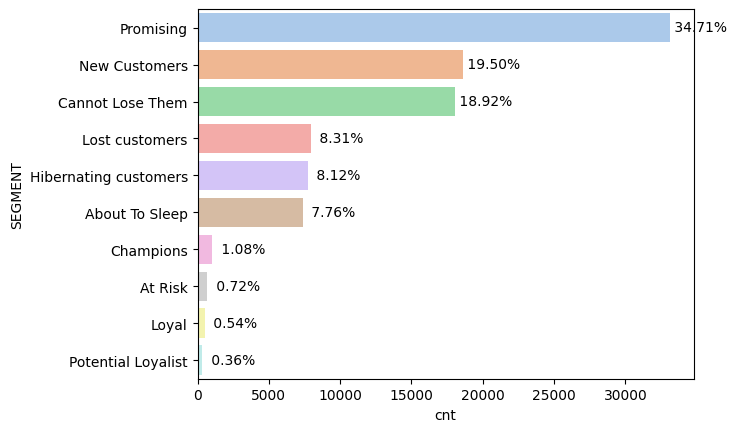

In [ ]:
ax = sns.barplot(x = 'cnt',y = 'SEGMENT', data = data, palette = 'pastel')
n = cst_sgmt['customer_unique_id'].nunique()
for p in ax.patches:
    ax.text(p.get_width()+2000, p.get_y() + p.get_height()/2,
            f'{100*int(p.get_width())/n: .2f}%',
            ha = 'center', va = 'center')

## Opportunity 3: Increase the # of Items/ Order

####  Average order size

In [101]:
# Khách hàng mua bao nhiêu item trên 1 order
count_item = df.groupby('order_id').agg(count_item = ('order_item_id', 'nunique')).reset_index()

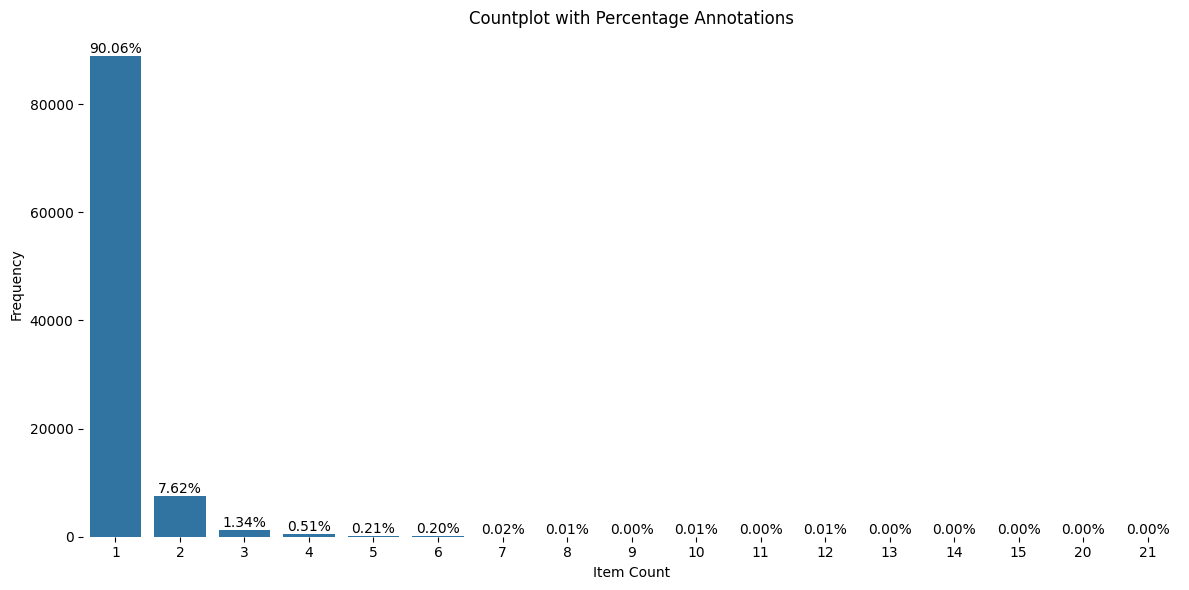

In [103]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=count_item, x='count_item')

# Tính tổng số lượng để tính phần trăm
total_count = count_item['count_item'].count()

# Thêm số liệu phần trăm vào trong biểu đồ
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

# Xoá khung biểu đồ
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# Cài đặt các yếu tố khác của biểu đồ
plt.title('Distribution of Item Counts')
plt.xlabel('Item Count')
plt.ylabel('Frequency')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [ ]:
# bao nhiêu % khách hàng mua 2 sản phẩm trở lên
count_item['count_item'].quantile(0.91)
# 91% khách hàng mua dưới 2 item/1 order


2.0

#### Which products are commonly bought together?

In [ ]:
# order nào mà có 2 sản phẩm khác nhau
df.groupby('order_id').agg(count_pd = ('product_id', 'nunique')).reset_index().sort_values(by = 'count_pd',ascending = False)

,order_id,count_pd
77909,ca3625898fbd48669d50701aba51cd5f,8
48309,7d8f5bfd5aff648220374a2df62e84d5,7
46116,77df84f9195be22a4e9cb72ca9e8b4c2,7
66653,ad850e69fce9a512ada84086651a2e7d,7
36443,5efc0b7fe9df7f0c567404abaa4d25fc,6
...,...,...
33440,56d0a27ec26d1644336aff1ec939c089,1
33439,56d01e37808556640e75a40c8202b0a8,1
33438,56ce64b53ec3bb5b0525f21506619f8e,1
33437,56ce3873eb6d633a47581ec221f50a65,1


In [ ]:
df[df['order_id']=='56ce64b53ec3bb5b0525f21506619f8e']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,delivery_time,actual_vs_estimated_dispatched_time,actual_vs_estimated_delivery_time,total_time,year,payment_status,date,day_of_week,day_name,hour
40074,56ce64b53ec3bb5b0525f21506619f8e,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-11-30 14:53:40,49.0,17.64,6d45947c18621227f1e82fda7a73f26c,delivered,2017-11-24 12:42:21,...,7.0,ontime,ontime,11.0,2017,success,2017-11-24,4,Fri,12


In [ ]:
pd_tuple = pd.merge(df,df,on ='order_id', how = 'inner')
pd_tuple = pd_tuple[pd_tuple['product_id_x']<pd_tuple['product_id_y']]

In [ ]:
pd_tuple.head(2)

,order_id,order_item_id_x,product_id_x,seller_id_x,shipping_limit_date_x,price_x,freight_value_x,customer_id_x,order_status_x,order_purchase_timestamp_x,...,delivery_time_y,actual_vs_estimated_dispatched_time_y,actual_vs_estimated_delivery_time_y,total_time_y,year_y,payment_status_y,date_y,day_of_week_y,day_name_y,hour_y
106,002f98c0f7efd42638ed6100ca699b42,2,880be32f4db1d9f6e2bec38fb6ac23ab,fa40cc5b934574b62717c68f3d678b6d,2017-08-10 09:30:15,44.9,7.16,75fd1fb0bb511fc71ac2b2649c02b21b,delivered,2017-08-04 09:19:10,...,3.0,ontime,ontime,3.0,2017,success,2017-08-04,4,Fri,9
121,00337fe25a3780b3424d9ad7c5a4b35e,2,13944d17b257432717fd260e69853140,cfb1a033743668a192316f3c6d1d2671,2017-09-29 17:50:16,59.9,9.94,4b1b5c848616a4b5fa9d76cb1d12067b,delivered,2017-09-25 17:39:29,...,0.0,ontime,ontime,1.0,2017,success,2017-09-25,0,Mon,17


In [ ]:
# có bn order_id mà chứa cặp pr_x, pr_y
pd_freq_tuple = pd_tuple.groupby(['product_id_x','product_id_y']).agg(count_order = ('order_id','nunique')).reset_index()\
.sort_values(by = 'count_order',ascending = False)

In [ ]:
pd_freq_tuple[pd_freq_tuple['count_order']>10]

,product_id_x,product_id_y,count_order
1577,36f60d45225e60c7da4558b070ce4b60,e53e557d5a159f5aa2c5e995dfdf244b,34
1530,35afc973633aaeb6b877ff57b2793310,99a4788cb24856965c36a24e339b6058,29
2161,4fcb3d9a5f4871e8362dfedbdb02b064,f4f67ccaece962d013a4e1d7dc3a61f7,17
1574,36f60d45225e60c7da4558b070ce4b60,3f14d740544f37ece8a9e7bc8349797e,12
1615,389d119b48cf3043d311335e499d9c6b,422879e10f46682990de24d770e7f83d,11
